The data description is as follows:   
- State: Field office by state, The office location does not reflect the complete area covered by the office’s jurisdiction. Please refer to USCIS.gov for office jurisdictions
- City: Field office by city
- Received: The number of new applications received and entered into a case-tracking system during the reporting period. 
- Approved: The number of applications approved during the reporting period.
- Denied: The number of applications that were denied, terminated, or withdrawn during the reporting period.
- Pending: The number of applications awaiting a decision as of the end of the reporting period
- Category: 
    - Family: Family-based applications for legal permanent resident (LPR) status are based on a family relationship with an LPR or a U.S. citizen
    - Employment: Employment-based applications are for purposes of employment or, in the case of entrepreneurs/investor, based on an investment in a new commercial enterprise
    - Humanitarian: Humanitarian-based applications include asylee, refugee, Indo Chinese, and Cuban refugee
    - Other: Others includes all other I-485 applications, to include those filed under the Haitian Refugee Immigration Fairness Act (HRIFA) program and the Creation of Record for North American Indians born in Canada based on Section 289 of the Immigration and Nationality Act (INA
    - Total: Total counts of all the I-485 records computed by uscis 
- Year: Year of the reporting period 
- Quarter: Quarter of the reporting period 
- Start_date: Beginning date of the quarter 
- End_date: Ending date of the quarter 

Note:  
- NaN was originally typed as D, which represents data withheld to protect applciants' privacy 
- 0 was originally represented as "-", but then converted to 0 for numerical analysis
- Some petitions approved, denied, or pending may have been received in previous reporting periods
- The report reflects the most up-to-date estimate available at the time the database is queried
- Counts may differ from those reported in previous quarters due to system updates and post-adjudicative outcomes


Sources: USCSI Information and statistics https://www.uscis.gov/tools/reports-studies/immigration-forms-data

Question:
- What is the distribution of the application received among cities?
- Does policy affects application numbers?
- How does the number of case changes over the year?
- Are there any correlation between population and the application case?
- What are the processing speed of the each cities? 
- What is the processing speed 


Importing the csvfile into pandas data frame   
I am currently focusing on the family based green card 
Based on the .info(), we see some null values but the data types seems aligned with the category

In [470]:
# For printing result inline at everywhere
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np 
from fiscalyear import FiscalQuarter
# import seaborn as sns 
# Read data, convert date time 
df = pd.read_csv('I485_data_all.csv', parse_dates = ['Start_date','End_date'])
# I am interested in family based green card 
family_category = df['Category'] == 'Family'
family_df = df[family_category]

# Understand the colum name, non-null counts, and data types
family_df.info()
family_df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922 entries, 0 to 1921
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   State       1922 non-null   object        
 1   City        1922 non-null   object        
 2   Received    1899 non-null   float64       
 3   Approved    1891 non-null   float64       
 4   Denied      1796 non-null   float64       
 5   Pending     1917 non-null   float64       
 6   Category    1922 non-null   object        
 7   Year        1922 non-null   int64         
 8   Quarter     1922 non-null   int64         
 9   Start_date  1922 non-null   datetime64[ns]
 10  End_date    1922 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(2), object(3)
memory usage: 180.2+ KB


Index(['State', 'City', 'Received', 'Approved', 'Denied', 'Pending',
       'Category', 'Year', 'Quarter', 'Start_date', 'End_date'],
      dtype='object')

In [471]:
# Let's see the snipits of the data
family_df.head()

,State,City,Received,Approved,Denied,Pending,Category,Year,Quarter,Start_date,End_date
0,Alabama,Montgomery,454.0,775.0,182.0,1647.0,Family,2019,2,2019-01-01,2019-03-31
1,Alaska,Anchorage,118.0,132.0,16.0,399.0,Family,2019,2,2019-01-01,2019-03-31
2,Arizona,Phoenix,926.0,796.0,168.0,6645.0,Family,2019,2,2019-01-01,2019-03-31
3,Arizona,Tucson,326.0,608.0,46.0,898.0,Family,2019,2,2019-01-01,2019-03-31
4,Arkansas,Fort Smith,159.0,257.0,18.0,622.0,Family,2019,2,2019-01-01,2019-03-31


In [472]:
family_df.tail()

,State,City,Received,Approved,Denied,Pending,Category,Year,Quarter,Start_date,End_date
1917,U.S. Virgin Islands,Christiansted,NaN,NaN,NaN,39.0,Family,2014,1,2013-10-01,2013-12-31
1918,Puerto Rico,San Juan,162.0,135.0,11.0,484.0,Family,2014,1,2013-10-01,2013-12-31
1919,Service Center,California,0.0,95.0,20.0,517.0,Family,2014,1,2013-10-01,2013-12-31
1920,Service Center,Nebraska,0.0,0.0,0.0,0.0,Family,2014,1,2013-10-01,2013-12-31
1921,Service Center,Texas,0.0,0.0,0.0,0.0,Family,2014,1,2013-10-01,2013-12-31


In [473]:
family_df.describe()

,Received,Approved,Denied,Pending,Year,Quarter
count,1899.000000,1891.000000,1796.000000,1917.000000,1922.000000,1922.000000
mean,886.043181,754.399788,104.834076,2806.437663,2016.388137,2.473465
std,913.485230,749.616612,118.912042,3548.054725,1.620478,1.097806
min,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000
25%,219.500000,242.500000,29.000000,549.000000,2015.000000,2.000000
50%,615.000000,523.000000,63.000000,1470.000000,2016.000000,2.000000
75%,1272.500000,1018.000000,139.000000,3653.000000,2018.000000,3.000000
max,6386.000000,6017.000000,947.000000,26221.000000,2019.000000,4.000000


In [474]:
family_df['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Guam', 'U.S. Virgin Islands',
       'Puerto Rico', 'Service Center'], dtype=object)

In [475]:
# Let's see how many nan values are there 
# isnull() to get the boolean table, mean to grap percentage, sort_values in descending, and map to format the data to 2 decimals
percent = (family_df.isnull().mean().sort_values(ascending=False)*100).map(lambda row: '%.2f' % row)
# sum to get the counts
total = family_df.isnull().sum().sort_values(ascending=False)
# Create single data frame to represent the missng values results
pd.concat([total,percent], axis = 1, keys=['Total','%'])

,Total,%
Denied,126,6.56
Approved,31,1.61
Received,23,1.20
Pending,5,0.26
End_date,0,0.00
Start_date,0,0.00
Quarter,0,0.00
Year,0,0.00
Category,0,0.00
City,0,0.00


The difficulty with this data is that each row contains each city at each year and quarter.  
Hence, simply dropping all the NaN could result in time discontinuity and miscount in the stae.  
For example, if california had NaN in 2016 only, but no NaN in every other year, california will experience empty year with it.   
Moreover, dropping 
Therefore, let's investigate the types of index and columns that is associated with null values.

First, let's take a look at the state. The way to read this data is that if each count in the table represents the quarter and year associated with it. For exmaple, if the count is 1, that means that the state has missing data from one quarter in one year. 

It is quite difficult to obtain the percentage because some states contain multiple cities, hence simply dividing by the number of different period could result in above 100%. Therefore, focusing on counts rather than percentage simplify the process. 

But, the Service center and U.S. Virgin Islands has pretty significant number.
Also, service center mostly process that employment based, so these two are the candidates for dropping.


In [476]:
# Which states and city has the most nan values?
# isna for null chdck, any() for any of them, axis =1 for row, tolist to convert to list of strings, ['State'] to get state column series, and value_counts to see the summary 
nan_row = family_df.isna().any(axis=1).tolist()
family_df[nan_row]['State'].value_counts()

U.S. Virgin Islands    31
Service Center         25
California             16
Maine                  15
Montana                10
Vermont                10
New Hampshire           6
New York                6
Kansas                  5
Washington              4
Alaska                  4
Delaware                4
Iowa                    3
South Carolina          2
Guam                    2
Arkansas                1
Puerto Rico             1
Florida                 1
Idaho                   1
Missouri                1
Name: State, dtype: int64

Based on the city name, we see weird things. Why do we see california, texas, and Nebraska? Those are the state name. Let's investigate

In [477]:
# Which city has the most nan values?
# Let's understand the number of different periods in this data 
nan_row = family_df.isna().any(axis=1).tolist()
num_periods = family_df['Start_date'].nunique()
family_df[nan_row]['City'].value_counts() / num_periods

Christiansted       0.857143
Imperial            0.761905
California          0.761905
Portland            0.714286
Charlotte Amalie    0.619048
St. Albans          0.476190
Helena              0.476190
Manchester          0.285714
Albany              0.285714
Wichita             0.238095
Nebraska            0.238095
Anchorage           0.190476
Texas               0.190476
Dover               0.190476
Spokane             0.142857
Des Moines          0.142857
Greer               0.095238
Boise               0.047619
Hagatna             0.047619
Fort Myers          0.047619
St. Louis           0.047619
Agana               0.047619
Yakima              0.047619
San Juan            0.047619
Fort Smith          0.047619
Name: City, dtype: float64

In [478]:
# I also want to see state and city combined 
nan_row = family_df.isna().any(axis=1).tolist()
family_df[nan_row].groupby(["State","City"]).size()

State                City            
Alaska               Anchorage            4
Arkansas             Fort Smith           1
California           Imperial            16
Delaware             Dover                4
Florida              Fort Myers           1
Guam                 Agana                1
                     Hagatna              1
Idaho                Boise                1
Iowa                 Des Moines           3
Kansas               Wichita              5
Maine                Portland            15
Missouri             St. Louis            1
Montana              Helena              10
New Hampshire        Manchester           6
New York             Albany               6
Puerto Rico          San Juan             1
Service Center       California          16
                     Nebraska             5
                     Texas                4
South Carolina       Greer                2
U.S. Virgin Islands  Charlotte Amalie    13
                     Christiansted    

As you can see, the service center has confusing name, state as a city name. 
Also, majoirty of the service center mainly work with employment based, so let's drop it 

We drop service center

In [479]:
# Grab row with state that needs to be dropped
drop_state = family_df['State']=='Service Center'
# Grab the index of those rows
index_names = family_df[drop_state].index
# Drop those index
family_df.drop(index_names, inplace=True)

Now, let's take a look at the data again

In [480]:
nan_row = family_df.isna().any(axis=1).tolist()
family_df[nan_row].groupby(["State","City"]).size()

State                City            
Alaska               Anchorage            4
Arkansas             Fort Smith           1
California           Imperial            16
Delaware             Dover                4
Florida              Fort Myers           1
Guam                 Agana                1
                     Hagatna              1
Idaho                Boise                1
Iowa                 Des Moines           3
Kansas               Wichita              5
Maine                Portland            15
Missouri             St. Louis            1
Montana              Helena              10
New Hampshire        Manchester           6
New York             Albany               6
Puerto Rico          San Juan             1
South Carolina       Greer                2
U.S. Virgin Islands  Charlotte Amalie    13
                     Christiansted       18
Vermont              St. Albans          10
Washington           Spokane              3
                     Yakima           

As you can see, the US. Virgin Islands has quite some data missing, how many cities are in Virgin Islands?
There are only 2 cities! So let's drop this state

In [481]:
# Grab row with state that needs to be dropped
drop_state = family_df['State']=='U.S. Virgin Islands'
# Grab the index of those rows
index_names = family_df[drop_state].index
# Drop those index
family_df.drop(index_names, inplace=True)

Again, let's invesitgate even more 

In [482]:
nan_row = family_df.isna().any(axis=1).tolist()
percent = family_df[nan_row].groupby(["State","City"]).size() / num_periods
percent

State           City      
Alaska          Anchorage     0.190476
Arkansas        Fort Smith    0.047619
California      Imperial      0.761905
Delaware        Dover         0.190476
Florida         Fort Myers    0.047619
Guam            Agana         0.047619
                Hagatna       0.047619
Idaho           Boise         0.047619
Iowa            Des Moines    0.142857
Kansas          Wichita       0.238095
Maine           Portland      0.714286
Missouri        St. Louis     0.047619
Montana         Helena        0.476190
New Hampshire   Manchester    0.285714
New York        Albany        0.285714
Puerto Rico     San Juan      0.047619
South Carolina  Greer         0.095238
Vermont         St. Albans    0.476190
Washington      Spokane       0.142857
                Yakima        0.047619
dtype: float64

In [483]:
# I'm going to drop all the city that has NaN values 
# nan_row = family_df.isna().any(axis=1).tolist()
# Grab row with state that needs to be dropped
for city in family_df[nan_row]['City'].unique():
    drop_city = family_df['City'] == city    
    index_names = family_df[drop_city].index
    family_df.drop(index_names,inplace=True)
# Drop those index
# family_df.drop(index_names, inplace=True)
family_df['City'].unique()
# index_names
# Drop those index
# family_df.drop(index_names, inplace=True)


array(['Montgomery', 'Phoenix', 'Tucson', 'Chula Vista', 'Fresno',
       'Los Angeles', 'Los Angeles County', 'Sacramento',
       'San Bernardino', 'San Diego', 'San Fernando Valley',
       'San Francisco', 'San Jose', 'Santa Ana', 'Denver', 'Hartford',
       'Washington', 'Hialeah', 'Jacksonville', 'Kendall', 'Miami',
       'Oakland Park', 'Orlando', 'Tampa', 'West Palm Beach', 'Atlanta',
       'Honolulu', 'Chicago', 'Indianapolis', 'Louisville', 'New Orleans',
       'Baltimore', 'Boston', 'Lawrence', 'Detroit', 'St. Paul',
       'Kansas City', 'Omaha', 'Las Vegas', 'Reno', 'Mount Laurel',
       'Newark', 'Albuquerque', 'Brooklyn', 'Buffalo', 'Long Island',
       'New York', 'Queens', 'Charlotte', 'Raleigh', 'Cincinnati',
       'Cleveland', 'Columbus', 'Oklahoma City', 'Philadelphia',
       'Pittsburgh', 'Providence', 'Charleston', 'Memphis', 'Nashville',
       'Dallas', 'El Paso', 'Harlingen', 'Houston', 'San Antonio',
       'Salt Lake City', 'Norfolk', 'Seattle', 'Milw

Done with data cleaning, let's start look at the data 

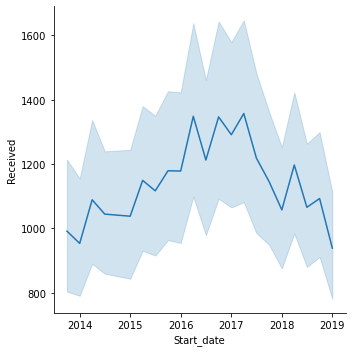

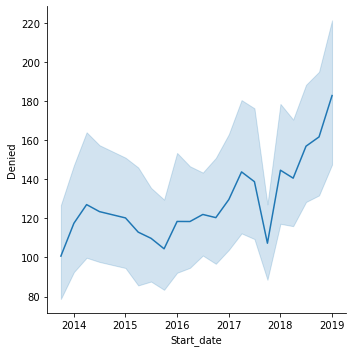

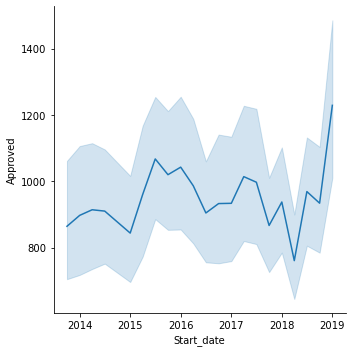

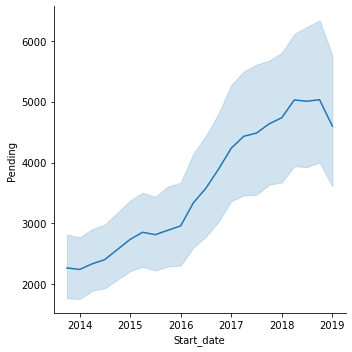

In [501]:
import seaborn as sns
sns.relplot(x='Start_date', y='Received',kind='line', data=family_df)
sns.relplot(x='Start_date', y='Denied',kind='line', data=family_df)
sns.relplot(x='Start_date', y='Approved',kind='line', data=family_df)
sns.relplot(x='Start_date', y='Pending',kind='line', data=family_df)


Index(['State', 'City', 'Received', 'Approved', 'Denied', 'Pending',
       'Category', 'Year', 'Quarter', 'Start_date', 'End_date'],
      dtype='object')

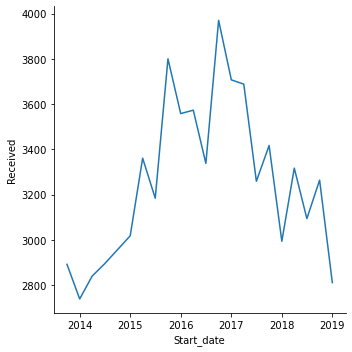

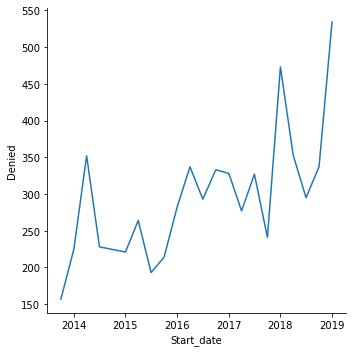

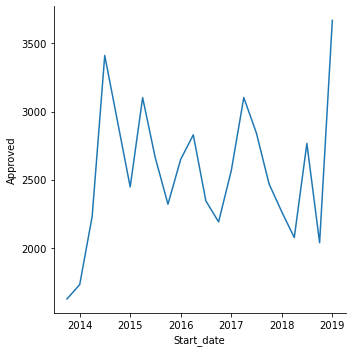

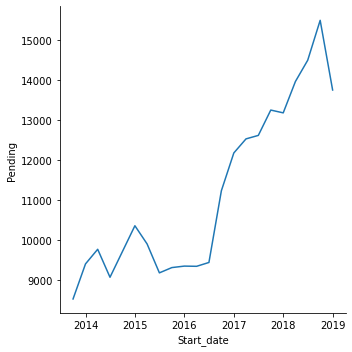

In [499]:
import seaborn as sns
illinois = family_df['State'] == "Illinois"
data = family_df[illinois]
data.columns
sns.relplot(x='Start_date', y='Received',kind='line', data=data)
sns.relplot(x='Start_date', y='Denied',kind='line', data=data)
sns.relplot(x='Start_date', y='Approved',kind='line', data=data)
sns.relplot(x='Start_date', y='Pending',kind='line', data=data)


